<a href="https://colab.research.google.com/github/Muh-Ayyub/Advanced-Mathmatics-Using-Google-colab/blob/main/CM2607_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#All imports used throughout entire coursework

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import cv2
from scipy.fftpack import fft2, fftshift, ifft2, dct, idct
from PIL import Image
from numpy.fft import fft2, fftshift, ifft2
from scipy.ndimage import gaussian_filter

In [12]:
#Question 1a - Working

#Define the symbols to be used in the function
x,y = sym.symbols('x y')

#Define the loss function
f = (sym.exp((x**2)+(y**2))+sym.cos(x*y))

#Calculate the partial derivatives of the loss function
f_xdiff = f.diff(x)
f_ydiff = f.diff(y)

In [13]:
#Question 1a - Answer
print("The partial differentiation of x: ")

f_xdiff

The partial differentiation of x: 


2*x*exp(x**2 + y**2) - y*sin(x*y)

In [14]:
#Question 1a - Answer
print("The partial differentiation of y: ")

f_ydiff

The partial differentiation of y: 


-x*sin(x*y) + 2*y*exp(x**2 + y**2)

In [15]:
#Question 1b - working

def calc_GradientVector():

  #Take the given input
  x_input = input("Enter the value of x: ")
  y_input = input("Enter the value of y: ")

  #Substitute values into their corresponding symbols
  x_vector = f_xdiff.subs({x: x_input, y: y_input})
  y_vector = f_ydiff.subs({x: x_input, y: y_input})

  #Calculate and round the values to 4 decimal places
  x_vector = sym.N(x_vector,4)
  y_vector = sym.N(y_vector,4)


  gradient_vector = [x_vector, y_vector]

  #Return the gradient vector
  return gradient_vector

In [17]:
2#Question 1b - answer
print(calc_GradientVector())

Enter the value of x: 1
Enter the value of y: 2
[295.0, 592.7]


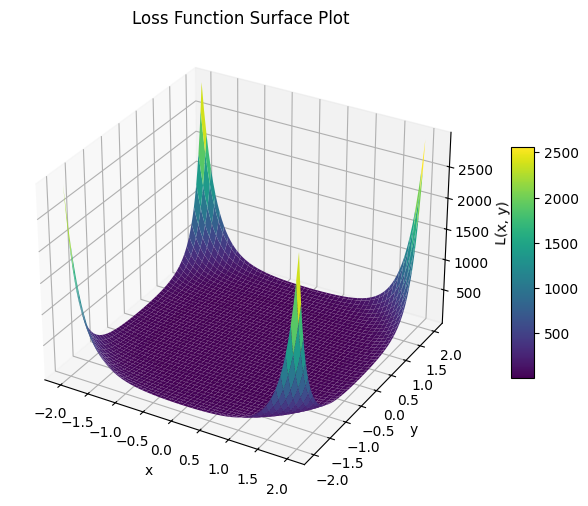

In [18]:
#Question 1c - working and answer

# Define the range of x and y values
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)

# Create a 2D grid of x and y values
x_grid, y_grid = np.meshgrid(x_values, y_values)

# Define the mathematical function for the surface
z_grid = np.exp((x_grid**2) + (y_grid**2)) + np.cos(x_grid * y_grid)

# Create a figure object for the plot
fig = plt.figure(figsize=(10, 6))

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')
# Label the axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('L(x, y)')

# Add a title to the plot
ax.set_title('Loss Function Surface Plot')

# Add a color bar to show the color mapping to z values
fig.colorbar(surface, shrink=0.5, aspect=10)

# Display the plot
plt.show()



Question 1d - answer

The gradient vector is the key signal in gradient descent methods for model optimization.It provides both the direction and magnitude of the necessary updates to minimize the loss function.By using this information, gradient descent can gradually converge to the optimal parameters,ensuring that the model performs well on unseen data. Understanding and managing the behavior of gradient vectors is critical for ensuring efficient and successful model training.

In [19]:
#Question 2a - working

# Define 't' as a symbolic variable
t = sym.Symbol('t')

# Define the amplitude function A(t)
f = (2 * (t**2)) * (sym.exp(-t))

# Compute the definite integral of A(t) from t = 0 to t = 4
f_xintg = sym.integrate(f, (t, 0, 4))

In [20]:
#Question 2a - answer
f_xintg

4 - 52*exp(-4)

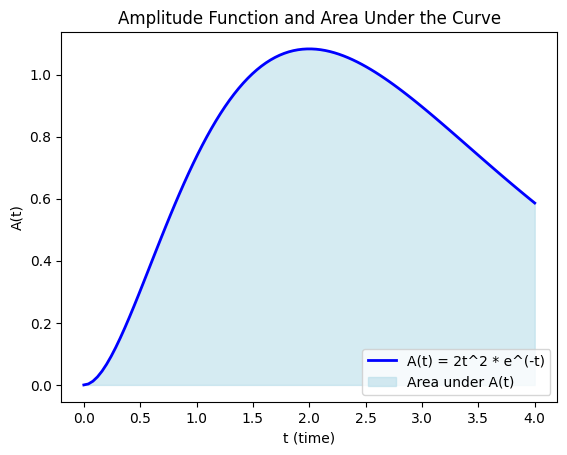

In [21]:
#Question 2b - answer and working

# Define the range of x (time) values for plotting
x_values = np.linspace(0, 4, 100)  # Generate 100 evenly spaced values between 0 and 4

# Compute the amplitude function values for each x value
y_values = ((2 * (x_values**2)) * (np.exp(-x_values)))

# Plot the amplitude function as a line
plt.plot(x_values, y_values, label="A(t) = 2t^2 * e^(-t)", color="blue", linewidth=2)

# Plot the area under the curve with a different color (light blue)
plt.fill_between(x_values, y_values, color='lightblue', label="Area under A(t)", alpha=0.5)

# Add a title and labels to the plot
plt.title("Amplitude Function and Area Under the Curve")
plt.xlabel("t (time)")
plt.ylabel("A(t)")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


Question 2c - answer

The integral of amplitude squared over time is often used to calculate energy.Therefore the integral represents the total energy that the signal carries over the time period, [0,4].

In [22]:
#Question 3a - working

# Define 'x' and 'n' as symbolic variables
x, n = sym.symbols("x n")

# Define the range of x values for plotting
x_values = np.linspace(-1, 1, 100)

# Initialize an empty list to store the first ten terms of the series
series_FirstTenTerms = []

# Define the common format of the terms in the series expansion
common_format = ((-1)**(n+1) * x**n) / n

# Initialize a list to store the approximations for each x value
approximations = []

# Generate the first 10 terms of the series expansion
for i in range(1, 11):
    series_FirstTenTerms.append(common_format.subs(n, i))

# Compute the approximation for ln(1 + x) for each value of x
for i in x_values:
    total = 0
    for j in series_FirstTenTerms:
        total = sym.N(j.subs(x, i), 4) + total
    approximations.append(total)


In [23]:
#Question 3a - answer
for i in range(len(approximations)):
  print("Approximation for "+str(x_values[i])+":   "+str(approximations[i]))

Approximation for -1.0:   -2.929
Approximation for -0.9797979797979798:   -2.736
Approximation for -0.9595959595959596:   -2.559
Approximation for -0.9393939393939394:   -2.397
Approximation for -0.9191919191919192:   -2.249
Approximation for -0.898989898989899:   -2.112
Approximation for -0.8787878787878788:   -1.986
Approximation for -0.8585858585858586:   -1.870
Approximation for -0.8383838383838383:   -1.762
Approximation for -0.8181818181818181:   -1.663
Approximation for -0.797979797979798:   -1.570
Approximation for -0.7777777777777778:   -1.483
Approximation for -0.7575757575757576:   -1.403
Approximation for -0.7373737373737373:   -1.327
Approximation for -0.7171717171717171:   -1.256
Approximation for -0.696969696969697:   -1.189
Approximation for -0.6767676767676767:   -1.126
Approximation for -0.6565656565656566:   -1.066
Approximation for -0.6363636363636364:   -1.010
Approximation for -0.6161616161616161:   -0.9565
Approximation for -0.5959595959595959:   -0.9056
Approxim

<ipython-input-24-ecc9b74122ad>:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_values, np.log(1 + np.array(x_values)), label="Actual Function")


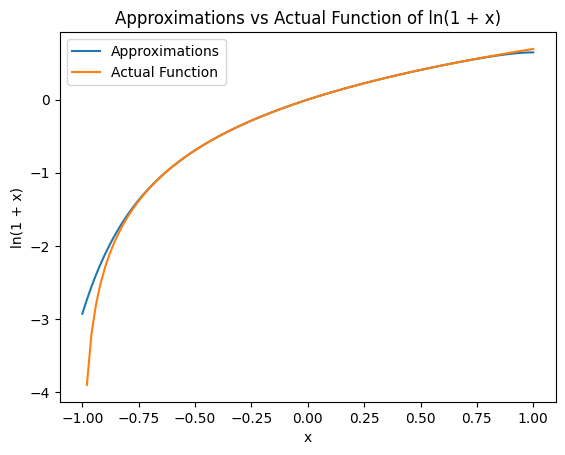

In [24]:
#Question 3b working and answer

# Plot the approximations and the actual function
plt.title("Approximations vs Actual Function of ln(1 + x)")
plt.plot(x_values, approximations, label="Approximations")
plt.plot(x_values, np.log(1 + np.array(x_values)), label="Actual Function")
plt.xlabel("x")
plt.ylabel("ln(1 + x)")
plt.legend()
plt.show()


Question 3c - answer

The error is equal to the difference between the value of the actual function ln(1+x) and the approximated value.So the computed error for each approximation increases as the value of |x| increases. Meaning for larger values of x the error is higher.

The error near x=0 is nearly 0 because this series converges very quickly for small values of x.

The error near x=1 increases significantly as x tends to 1 meaning it coverges very slowly.

The error near x=-1 diverges as x tends to -1 because ln(0) is undefined.

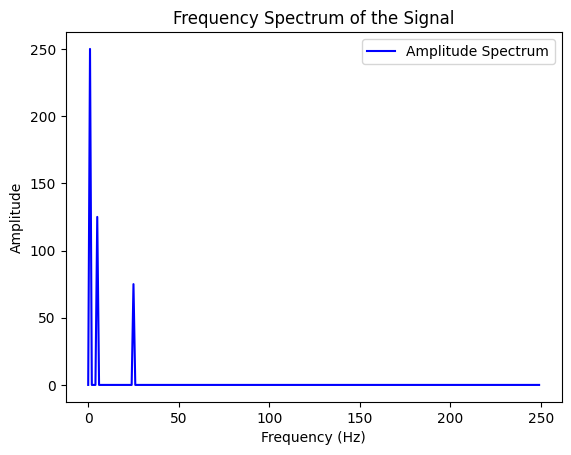

In [25]:
#Question 4a working and answer

# Define signal parameters

# Sampling frequency (Hz)
f = 500

 # Sampling period (s)
T = 1 / f

# Number of samples
N = 500

# Time interval for one second, without including the endpoint
T_interval = np.linspace(0, 1, N, endpoint=False)

# Create a composite signal: combination of three sine waves with different frequencies and amplitudes
s_t = (np.sin(2 * np.pi * T_interval) + 0.5 * np.sin(10 * np.pi * T_interval) + 0.3 * np.sin(50 * np.pi * T_interval))

# Perform Fast Fourier Transform (FFT) to compute the frequency spectrum
ft_result = np.fft.fft(s_t)
frequencies = np.fft.fftfreq(N, T)

# Compute the amplitude spectrum
amplitude_spectrum = np.abs(ft_result)

# Select only the positive half of the frequency spectrum (FFT is symmetric for real signals)
positive_freqs = frequencies[:N // 2]
positive_amplitudes = amplitude_spectrum[:N // 2]

# Plot the amplitude spectrum
plt.plot(positive_freqs, positive_amplitudes, color='blue', label="Amplitude Spectrum")
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

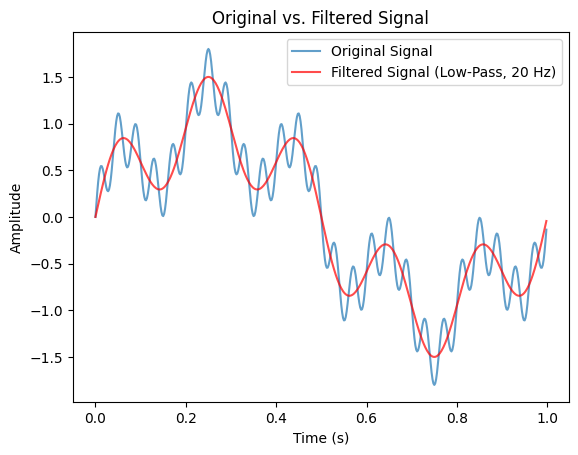

In [26]:
#Question 4b - working and answer

# Define a low-pass filter to limit frequencies to 20 Hz
freq_limit = 20

#Boolean mask for frequencies below the limit
low_pass_filter = np.abs(frequencies) <= freq_limit

# Apply the low-pass filter to the FFT result
filtered_ft_result = ft_result * low_pass_filter

# Perform the inverse FFT to reconstruct the signal with filtered frequencies while keeping the real part
filtered_signal = np.fft.ifft(filtered_ft_result).real

# Plot the original signal and the filtered signal
plt.plot(T_interval, s_t, label="Original Signal", alpha=0.7)
plt.plot(T_interval, filtered_signal, label="Filtered Signal (Low-Pass, 20 Hz)", alpha=0.7, color='red')
plt.title("Original vs. Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()



Question 4c - answer

As you can see from the comparisons, the original signal contained high frequency variations that adds sharp variation.
By removing frequences above 20Hz, the filtered signal contains much less noise and is much smoother as a result.

Some other real world applications such as this noise reduction in audio processing include:

In biomedical signals, high-frequency noise can obscure the lower-frequency patterns.

As well as for data prepration in machine learning, this low-pass filtering can be used to remove noise from the input data.

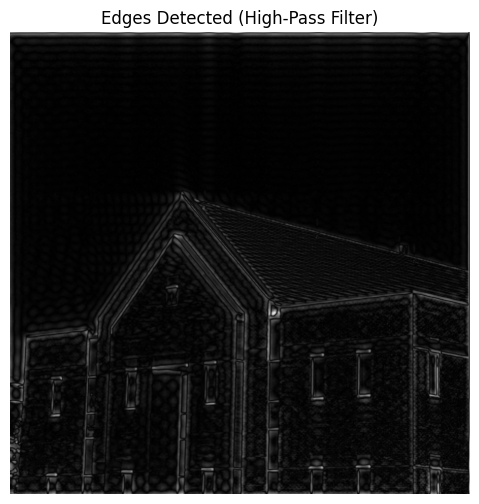

In [27]:
#Question 5a - working and answer

# Load the image
image_path = 'Image.png'
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert the image to a numpy array for processing
image_array = np.array(image)

# Perform 2D Fourier Transform
f_transform = fft2(image_array)
f_shift = fftshift(f_transform)

# Compute the magnitude spectrum
magnitude_spectrum = np.log(1 + np.abs(f_shift))


# Create a high-pass filter to detect edges
rows, cols = image_array.shape
crow, ccol = rows // 2, cols // 2

# Mask to remove low frequencies (high-pass filter)
hp_filter = np.ones((rows, cols))

# Radius of the low-frequency region to block
radius = 30

hp_filter[crow - radius:crow + radius, ccol - radius:ccol + radius] = 0

# Apply the high-pass filter
f_shift_hp = f_shift * hp_filter

# Perform the inverse Fourier Transform
f_ishift = np.fft.ifftshift(f_shift_hp)
image_edges = np.abs(ifft2(f_ishift))

# Visualize the resulting image with detected edges
plt.figure(figsize=(6, 6))
plt.title('Edges Detected (High-Pass Filter)')
plt.imshow(image_edges, cmap='gray')
plt.axis('off')
plt.show()

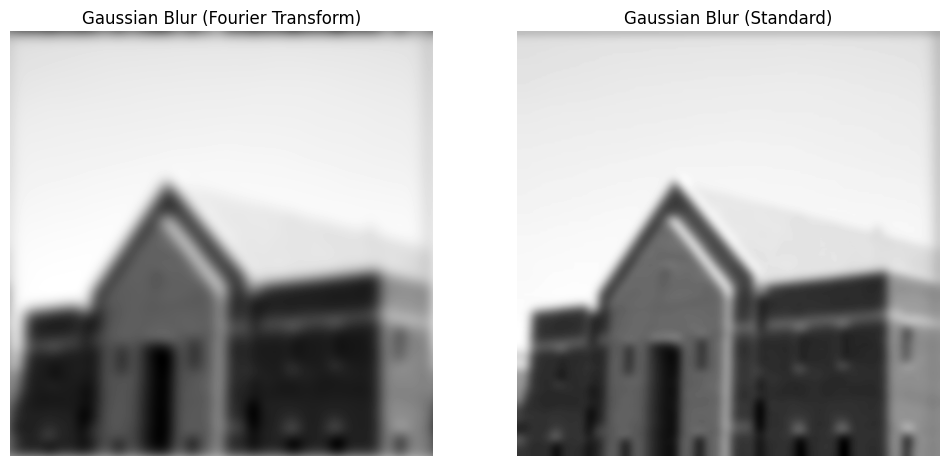

In [28]:
#Question 5b - working and answer

# Create a Gaussian low-pass filter
x = np.linspace(-cols // 2, cols // 2, cols)
y = np.linspace(-rows // 2, rows // 2, rows)
x, y = np.meshgrid(x, y)

# Standard deviation for Gaussian kernel
sigma = 10

gaussian_filter_2d = np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Normalize the filter
gaussian_filter_2d /= gaussian_filter_2d.sum()

# Apply the Gaussian filter in the frequency domain
f_shift_blur = f_shift * gaussian_filter_2d

# Perform the inverse Fourier Transform
f_ishift_blur = np.fft.ifftshift(f_shift_blur)
image_blurred_fft = np.abs(ifft2(f_ishift_blur))

# Apply a standard Gaussian blur for comparison
image_blurred_standard = gaussian_filter(image_array, sigma=sigma)

# Visualize the results
plt.figure(figsize=(12, 6))

# Fourier-based Gaussian blur
plt.subplot(1, 2, 1)
plt.title('Gaussian Blur (Fourier Transform)')
plt.imshow(image_blurred_fft, cmap='gray')
plt.axis('off')

# Standard Gaussian blur
plt.subplot(1, 2, 2)
plt.title('Gaussian Blur (Standard)')
plt.imshow(image_blurred_standard, cmap='gray')
plt.axis('off')

plt.show()

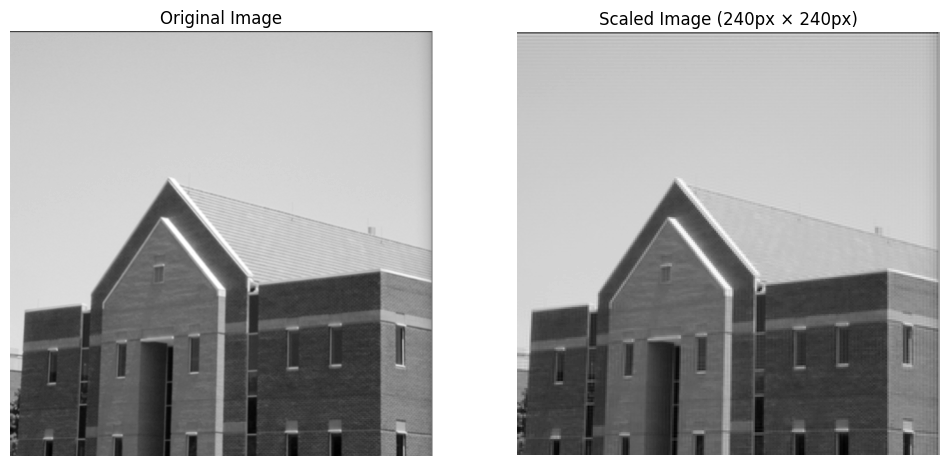

In [29]:
#Question 5c - working and answer

# Function to apply 2D DCT
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

# Function to apply 2D inverse DCT
def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# Apply DCT to the original image
dct_image = dct2(image_array)

# Scale down the image to 240px × 240px by zeroing out high-frequency components
scaled_dct = np.zeros((240, 240))
scaled_dct[:240, :240] = dct_image[:240, :240]

# Reconstruct the scaled image using inverse DCT
scaled_image = idct2(scaled_dct)

# Visualize the original and scaled images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_array, cmap='gray')
plt.axis('off')

# Scaled image
plt.subplot(1, 2, 2)
plt.title('Scaled Image (240px × 240px)')
plt.imshow(scaled_image, cmap='gray')
plt.axis('off')

plt.show()

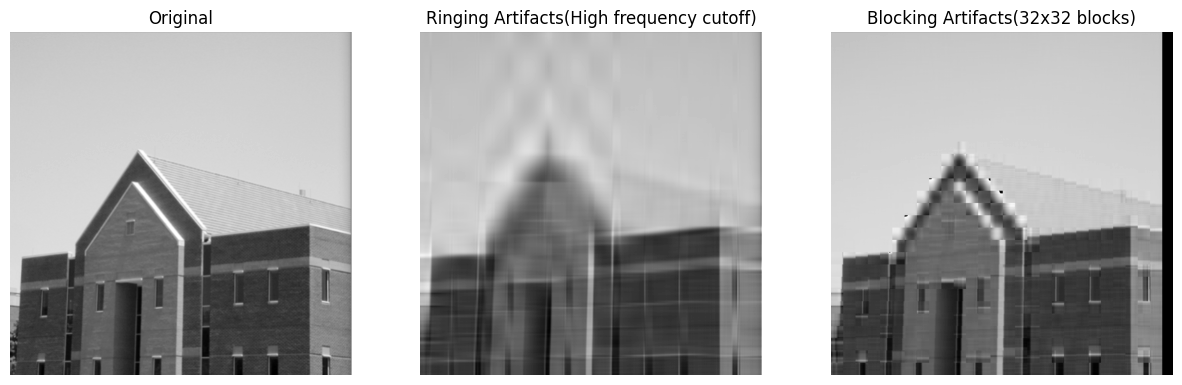

In [30]:
#Question 5d - working and answer

# Define the functions to perform 2D Discrete Cosine Transform (DCT) and its inverse
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

# Create ringing artifacts by sharp frequency cutoff
def create_ringing_artifacts(image):

    # Perform 2D DCT on the input image
    dct_image = dct2(image)

    # Create a mask to apply the sharp cutoff
    mask = np.ones_like(dct_image)

    # Sharp cutoff to induce ringing
    mask[10:, 10:] = 0

    # Apply the mask to the DCT image
    dct_image = dct_image * mask

    return idct2(dct_image)


# Create blocking artifacts
def create_blocking_artifacts(image, block_size=32):

    height, width = image.shape
    result = np.zeros_like(image)

    # Iterate over the image in blocks of the specified size
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):

            # Extract the current block
            block = image[i:i+block_size, j:j+block_size]

            # Check if the block has the correct size and perform 2D DCT if it does
            if block.shape[0] == block_size and block.shape[1] == block_size:
                dct_block = dct2(block)

                # Keep only DC component to create obvious blocking
                dct_block[1:, 1:] = 0

                # Perform 2D Inverse DCT on the modified block and store it in the result
                result[i:i+block_size, j:j+block_size] = idct2(dct_block)

    return result

# Generate both artifacts
ringing = create_ringing_artifacts(image_array)
blocking = create_blocking_artifacts(image_array)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Ringing Artifacts\
(High frequency cutoff)')
plt.imshow(ringing, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Blocking Artifacts\
(32x32 blocks)')
plt.imshow(blocking, cmap='gray')
plt.axis('off')

plt.show()

Ringing Artifacts:

Ringing artifacts occur due to the truncation of high-frequency DCT coefficients during compression.
These artifacts appear as oscillations or ripples around sharp edges in the image, especially near areas with high contrast.
The loss of high-frequency details results in a smoothed appearance, but the abrupt transitions at edges cause the ripples.

Blocking Artifacts:

Blocking artifacts arise when the image is divided into small blocks (e.g., 8x8 or 16x16) for DCT processing, and the blocks are compressed independently.
Due to quantization and loss of information, discontinuities can appear at the boundaries of these blocks, leading to visible grid-like patterns.
These artifacts are more pronounced at lower compression quality or when larger block sizes are used.